# Previsão Da Religião Predominante Em Um País Com Base Em Sua Bandeira

Os documentos necessários para a o processamento do modelo apresentado a seguir estão disponíveis em [Github.com/Gvascons/Prediction---Naive-Bayes](https://github.com/Gvascons/Prediction---Naive-Bayes), e seu usos são explicítados e justificados ao longo desta composição. O Banco de Dados foi fornecido pelo portal [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Flags). 

# Predição baseada no classificador probabilístico de Naive Bayes

A biblioteca "*pandas*", criada para a linguagem Python, permite manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

In [ ]:
import pandas as pd

##Elucidando o desenvolvimento do Algoritmo

A fim de facilitar e aclarar o descorrimento quanto ao método probabilístico de Naive Bayes, antes de tudo, iremos inferir o uso de tal em um exemplo simples, no qual será possível discorrer sobre a implicação do algoritmo em cada etapa. Posteriormente, realizaremos o estudo proferido ao objetivo do documento. 

Antes de desenvolvermos um modelo que irá tentar determinar a
religião predominante em um país com base nas características de sua bandeira, consideremos o seguinte problema:
*   Nos é dado um banco de dados contendo alguns clientes de um Banco Fincanceiro.
*   Cada cliente é armazenado no banco através dos seguintes parâmetros : **Histórico de Crédito, Dívidas, Garantias, Renda, Risco**.
*   A fim de filtrar a aceitabilidade de futuros clientes, o Banco Financeiro pretende analisar tais atributos para um possível usuário e, a partir disto, predizer o risco que tal cliente representa.

*O Banco de Dados utilizado está disponível [GitHub.com/Gvascons/Prediction---Naive-Bayes](https://github.com/Gvascons/Prediction---Naive-Bayes) - DummyData.csv*



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
#Fazemos o upload do Banco de Dados "Dummy" fornecido - DummyData.csv

Saving DummyData.csv to DummyData.csv
User uploaded file "DummyData.csv" with length 537 bytes


In [ ]:
#Por tratarmos de um arquivo ".csv", a formatação do texto já é automatizada em relação à separação dos campos por vírgulas  
base = pd.read_csv('DummyData.csv',sep=',')
#Printamos o nosso banco de dados Dummy
print("base: \n\n{}".format(base))

base: 

        historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto


Saving NaiveDummy.JPG to NaiveDummy.JPG


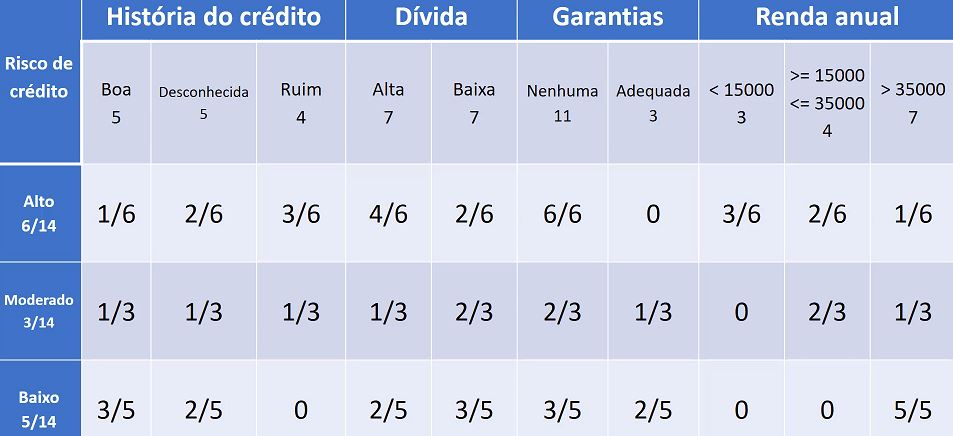

In [ ]:
#A Imagem em questão apenas pretende facilitar o discorriemnto quanto à feição do algoritmo.* - (Imagem disponível no GitHub fornecido - NaiveDummy.JPG)
from IPython import display

uploaded = files.upload()

display.Image("NaiveDummy.JPG")

O modo como é trabalhado o  algoritmo probabilístico pretende, primordialmente, povoar uma tabela com os dados do Banco de Dados fornecido de modo que haja um grau de coordenação em cada uma das inserções. 

---
Aplicando para o nosso exemplo em questão :
*   Na Primeira Coluna, referente às Classes ( isto é, o atributo ao qual pretendemos fazer a predição ), o numerador define a quantidade de ocorrências do valor no banco de dados, e o denominador define a quantidade total de "linhas"/clientes no banco.
*   Nos demais campos, correspontes aos parâmetros que utilizaremos para realizar a previsão, em cada linha o  denominador dever corresponder ao numerador da Primeira Coluna ( numerador das classes ).
*   Por fim, povoamos os numeradores dos demais registros com a frequência que corresponda à presença simultânea do parâmetro e da classe relativa a esta. (Por exemplo, temos que 3 clientes no Banco de Dados apresentaram um Histórico de Crédito Ruim e um Risco Alto de forma coexistente. Logo, o registro na nossa tabela referente à tal posição deve conter 3/6).
*   Este processo é repetido até a tabela se encontrar completamente povoada.

---




### Simulando a aceitabilidade de um cliente em potencial

Supondo um cliente contendo: Histórico de Crédito Bom, Dívida Alta, Nenhuma Garantia, Renda > 35000:

*   P(Alto) = (6/14)\*(1/6)\*(4/6)\*(6/6)\*(1/6) = 0,0079
*   P(Moderado) = (3/14)\*(1/3)\*(1/3)\*(2/3)\*(1/3) = 0,0052
*   P(Baixo) = (5/14)\*(3/5)\*(2/5)\*(3/5)\*(5/5) = 0,0514
---
> Soma: 0,0079 + 0,0052 + 0,0514 = 0,0645

> P(Alto) = 0,0079/0,0645 = 12,24%

> P(Moderado) = 0,0052/0,0645 = 8,06%

> **P(Baixo) = 0,0514/0,0645 = 79,68%**

Logo, espera-se que o cliente apresente um risco **baixo**.

## Dando continuidade à aplicabilidade do Método

Agora que elucidamos a metodologia na qual será baseada a nossa predição, desenvolveremos o algoritmo, com o artifício de bibliotecas facilitadoras de Pyhton, em conformidade com o objetivo descrito no documento.


*O Banco de Dados utilizado está disponível [GitHub.com/Gvascon/Prediction---Naive-Bayes](https://github.com/Gvascons/Prediction---Naive-Bayes) - flag.data*

In [ ]:
uploaded = files.upload()

#Fazemos o upload do Banco de Dados flag.data fornecido.

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving flag.data to flag.data
User uploaded file "flag.data" with length 15240 bytes


In [ ]:
"""
from google.colab import drive
drive.mount(drive.mount("/content/gdrive"))
"""
#O código em questão define apenas uma alternativa de acesso aos arquivos necessários para o estudo do documento.

'\nfrom google.colab import drive\ndrive.mount(drive.mount("/content/gdrive"))\n'

https://archive.ics.uci.edu/ml/datasets/Flags

In [ ]:
"""
Apesar de não estarmos trabalhando com um arquivo do tipo ".csv", o nosso documento ".data" também apresenta seus
registros internos separados por vírgulas. Logo, a nossa biblioteca "pandas" ainda permite formatá-lo através da
referenciação do caractére separador (sep=','), como parâmetro.  
"""
base = pd.read_csv('flag.data',sep=',', header=None)
##Printamos o nosso banco de dados Dummy
print("base: \n\n{}".format(base))

base: 

                 0   1   2     3   4   5   6   ...  23  24  25  26  27     28     29
0       Afghanistan   5   1   648  16  10   2  ...   0   0   1   0   0  black  green
1           Albania   3   1    29   3   6   6  ...   0   0   0   1   0    red    red
2           Algeria   4   1  2388  20   8   2  ...   1   0   0   0   0  green  white
3    American-Samoa   6   3     0   0   1   1  ...   0   1   1   1   0   blue    red
4           Andorra   3   1     0   0   6   0  ...   0   0   0   0   0   blue    red
..              ...  ..  ..   ...  ..  ..  ..  ...  ..  ..  ..  ..  ..    ...    ...
189   Western-Samoa   6   3     3   0   1   1  ...   0   0   0   0   0   blue    red
190      Yugoslavia   3   1   256  22   6   6  ...   0   0   0   0   0   blue    red
191           Zaire   4   2   905  28  10   5  ...   0   0   1   1   0  green  green
192          Zambia   4   2   753   6  10   5  ...   0   0   0   1   0  green  brown
193        Zimbabwe   4   2   391   8  10   5  ...   0   

In [ ]:
previsores = base.iloc[:].values
classe = base.iloc[:,6].values

"""
Atribuímos ao objeto 'previsores' os parâmetros que serão utilizados para o "treinamento" do nosso modelo, definindo
o retorno de um "Panda Series" quando uma linha é selecionada, e de um "Pandas DataFrame" quando multiplas linhas
são selecionadas.  Atribuímos ao objeto 'classe' as classes as quais pretendemos realizar as previsões ( a religião 
predominante em cada país ). 
"""
print("Panda Series quando uma linha é selecionada :\n\n{}".format(previsores[[0]]))
print("\n")
print("Panda DataFrame quando múltiplas linhas são selecionadas :\n\n{}".format(previsores))
print("\n")
print("Classes:\n\n{}".format(classe))

Panda Series quando uma linha é selecionada :

[['Afghanistan' 5 1 648 16 10 2 0 3 5 1 1 0 1 1 1 0 'green' 0 0 0 0 1 0 0
  1 0 0 'black' 'green']]


Panda DataFrame quando múltiplas linhas são selecionadas :

[['Afghanistan' 5 1 ... 0 'black' 'green']
 ['Albania' 3 1 ... 0 'red' 'red']
 ['Algeria' 4 1 ... 0 'green' 'white']
 ...
 ['Zaire' 4 2 ... 0 'green' 'green']
 ['Zambia' 4 2 ... 0 'green' 'brown']
 ['Zimbabwe' 4 2 ... 0 'green' 'green']]


Classes:

[2 6 2 1 0 5 1 1 0 0 1 0 1 2 2 1 0 1 5 1 3 0 5 0 1 2 6 5 3 5 1 1 0 1 5 5 0
 6 0 2 5 1 0 6 1 6 1 2 1 0 0 2 0 5 1 1 1 1 1 0 0 0 5 5 6 1 5 1 1 1 1 1 0 2
 5 4 0 0 3 6 1 4 2 2 2 0 7 0 5 1 7 2 3 5 1 2 6 2 5 5 2 0 0 1 5 2 2 2 0 1 2
 4 0 1 0 6 1 2 5 1 4 1 1 1 0 2 2 1 6 2 1 2 2 0 5 0 0 0 6 0 0 2 6 5 0 0 2 2
 1 5 3 1 2 1 7 2 0 3 1 1 1 1 2 1 1 1 1 2 3 5 3 7 1 1 2 2 1 1 2 5 1 0 1 1 6
 1 0 0 6 1 6 5 5 5]


Como o método probabilístico não tem a capacidade de processar valores não discretos (Nomes dos países, cores ...) é necessário que ,antes de treinarmos o nosso modelos, atribuamos valores discretos e inteiros para tais parâmetros. Para isto, fazemos uso da biblioteca de aprendizado de máquina scikit-learn (originalmente scikits.learn), de Python (open-source library), responsável pelo preprocessamento dos atributos não válidos e pela instanciação automática de valores à tais registros (Ex.: Afghanistan = 0, Albania = 1, green = 2 **...**).

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
previsores[0:,0] = labelencoder.fit_transform(previsores[0:,0])
previsores[0:,17] = labelencoder.fit_transform(previsores[0:,17])
previsores[0:,28] = labelencoder.fit_transform(previsores[0:,28])
previsores[0:,29] = labelencoder.fit_transform(previsores[0:,29])
#Os valores que necessitam ser instanciados novamente apresentam posições fixas em cada coluna do banco de dados.

print("Previsores após o pré-processamento:\n\n{}".format(previsores))

Col17 = {"black":0, "blue":1,"white":7,"red":6,"green":4,"gold":3,"orange":5 }
Col28 = {"black":0, "blue":1,"white":6,"red":5,"green":3,"gold":2,"orange":4 }
Col29 = {"black":0, "blue":1,"white":7,"red":6,"green":4,"gold":3,"orange":2 }

print("\n")

print("Correspondência da coluna 17: {}".format(Col17))
print("Correspondência da coluna 28: {}".format(Col28))
print("Correspondência da coluna 29: {}".format(Col29))


Previsores após o pré-processamento:

[[0 5 1 ... 0 0 4]
 [1 3 1 ... 0 5 6]
 [2 4 1 ... 0 3 7]
 ...
 [191 4 2 ... 0 3 4]
 [192 4 2 ... 0 3 2]
 [193 4 2 ... 0 3 4]]


Correspondência da coluna 17: {'black': 0, 'blue': 1, 'white': 7, 'red': 6, 'green': 4, 'gold': 3, 'orange': 5}
Correspondência da coluna 28: {'black': 0, 'blue': 1, 'white': 6, 'red': 5, 'green': 3, 'gold': 2, 'orange': 4}
Correspondência da coluna 29: {'black': 0, 'blue': 1, 'white': 7, 'red': 6, 'green': 4, 'gold': 3, 'orange': 2}


In [ ]:
"""
A classe em questão apenas pretende facilitar a retomada para um valor não discreto quando
obtivermos o index da religião alvo obtida ao fim da previsão, sem termos de fazer a consulta
bruta e examinarmos a qual número corresponde cada religião.
"""

class Religion:
  def __init__(self, num):
    self.num = num
  def __str__(self):
    if self.num == 0:
      return 'Catholic'
    if self.num == 1:
      return 'Other Christian'
    if self.num == 2:
      return 'Muslim'
    if self.num == 3:
      return 'Buddhist'
    if self.num == 4:
      return 'Hindu'
    if self.num == 5:
      return 'Ethnic'
    if self.num == 6:
      return 'Marxist'
    if self.num == 7:
      return 'Others'


###Treinando o Modelo

Por fim, com o banco de dados já pronto para ser trabalhado, fazemos uso do método 'naive_bayes' do objeto GaussianNB (Gaussian Naive Bayes), contido na biblioteca sklearn ([GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), que irá automatizar o processo exposto na seção "Simulando a aceitabilidade de um cliente em potencial" deste documento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores,classe)

GaussianNB(priors=None, var_smoothing=1e-09)

Antes de pormos o algoritmo à prova e fazermos previsões para novas bandeiras em potencial, conferimos a acertabilidade do algoritmo para registros já contidos no nosso banco de dados.

In [ ]:
#Afghanistan 2
resultado1 = classificador.predict(previsores[[0]])
#American-Samoa 1
resultado2 = classificador.predict(previsores[[3]])
#Argentina 0
resultado3 = classificador.predict(previsores[[8]])
#...
print("Religião: {}".format(Religion(resultado1)))
print("Religião: {}".format(Religion(resultado2)))
print("Religião: {}".format(Religion(resultado3)))

Religião: Muslim
Religião: Other Christian
Religião: Catholic


## Usabilidade do Algoritmo para caso livre 

Por fim, aplicamos atributos de possíveis bandeiras ao nosso modelo já treinado e ,a partir disto, nos é esperado a predição da religião predominante na nação a qual tal bandeira pertence.

### Exemplo 1:

O exemplo da bandeira a seguir foi retirado da franquia de livros fantasiosos *The Witcher*, que surgiu durante a década de 1980, na Polônia.

Saving flag.jpg to flag.jpg


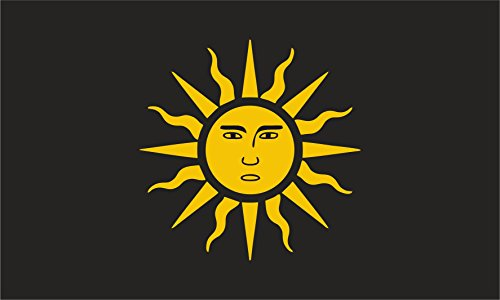

In [ ]:
#(Imagem disponível no GitHub fornecido - flag.jpg)
uploaded = files.upload()

display.Image("flag.jpg")

* Name: Nilfgaard (194)
* Landmass: Europe (3)
* Zone: NE (1)
* Area: 385.207 km² (384)
* Population: 5.328.000 (5)
* Language: Others (10)
* Religion: Unknown (8)
* Bars: 0
* Stripes: 0
* Colours: 2
* Red: 0 
* Green: 0
* Blue: 0
* Gold: 1
* White: 0
* Black: 1
* Orange: 0
* Mainhue: Gold (3)
* Circles: 1
* Crosses: 0
* Saltires: 0
* Quarters: 0
* Sunstars: 1
* Crescent: 0
* Triangle: 1
* Icon: 1
* Animate: 1
* Text: 0
* Topleft: Black (0)
* Botright: Black (0)


In [ ]:
#DadosNilfgaard = [194,3,1,384,10,8,0,0,2,0,0,1,0,1,0,3,1,0,0,0,1,0,1,1,1,0,0,0]
resultado = classificador.predict([[194,3,1,384,5,10,8,0,0,2,0,0,0,1,0,1,0,3,1,0,0,0,1,0,1,1,1,0,0,0]])
print("Religião previsionada: {}".format(Religion(resultado)))

Religião previsionada: Others


###Exemplo 2:

O exemplo da bandeira a seguir é referente a um país fictício localizado na África subsariana presente nas histórias em quadrinhos publicadas pela Marvel Comics (Wakanda).

Saving flag2.png to flag2.png


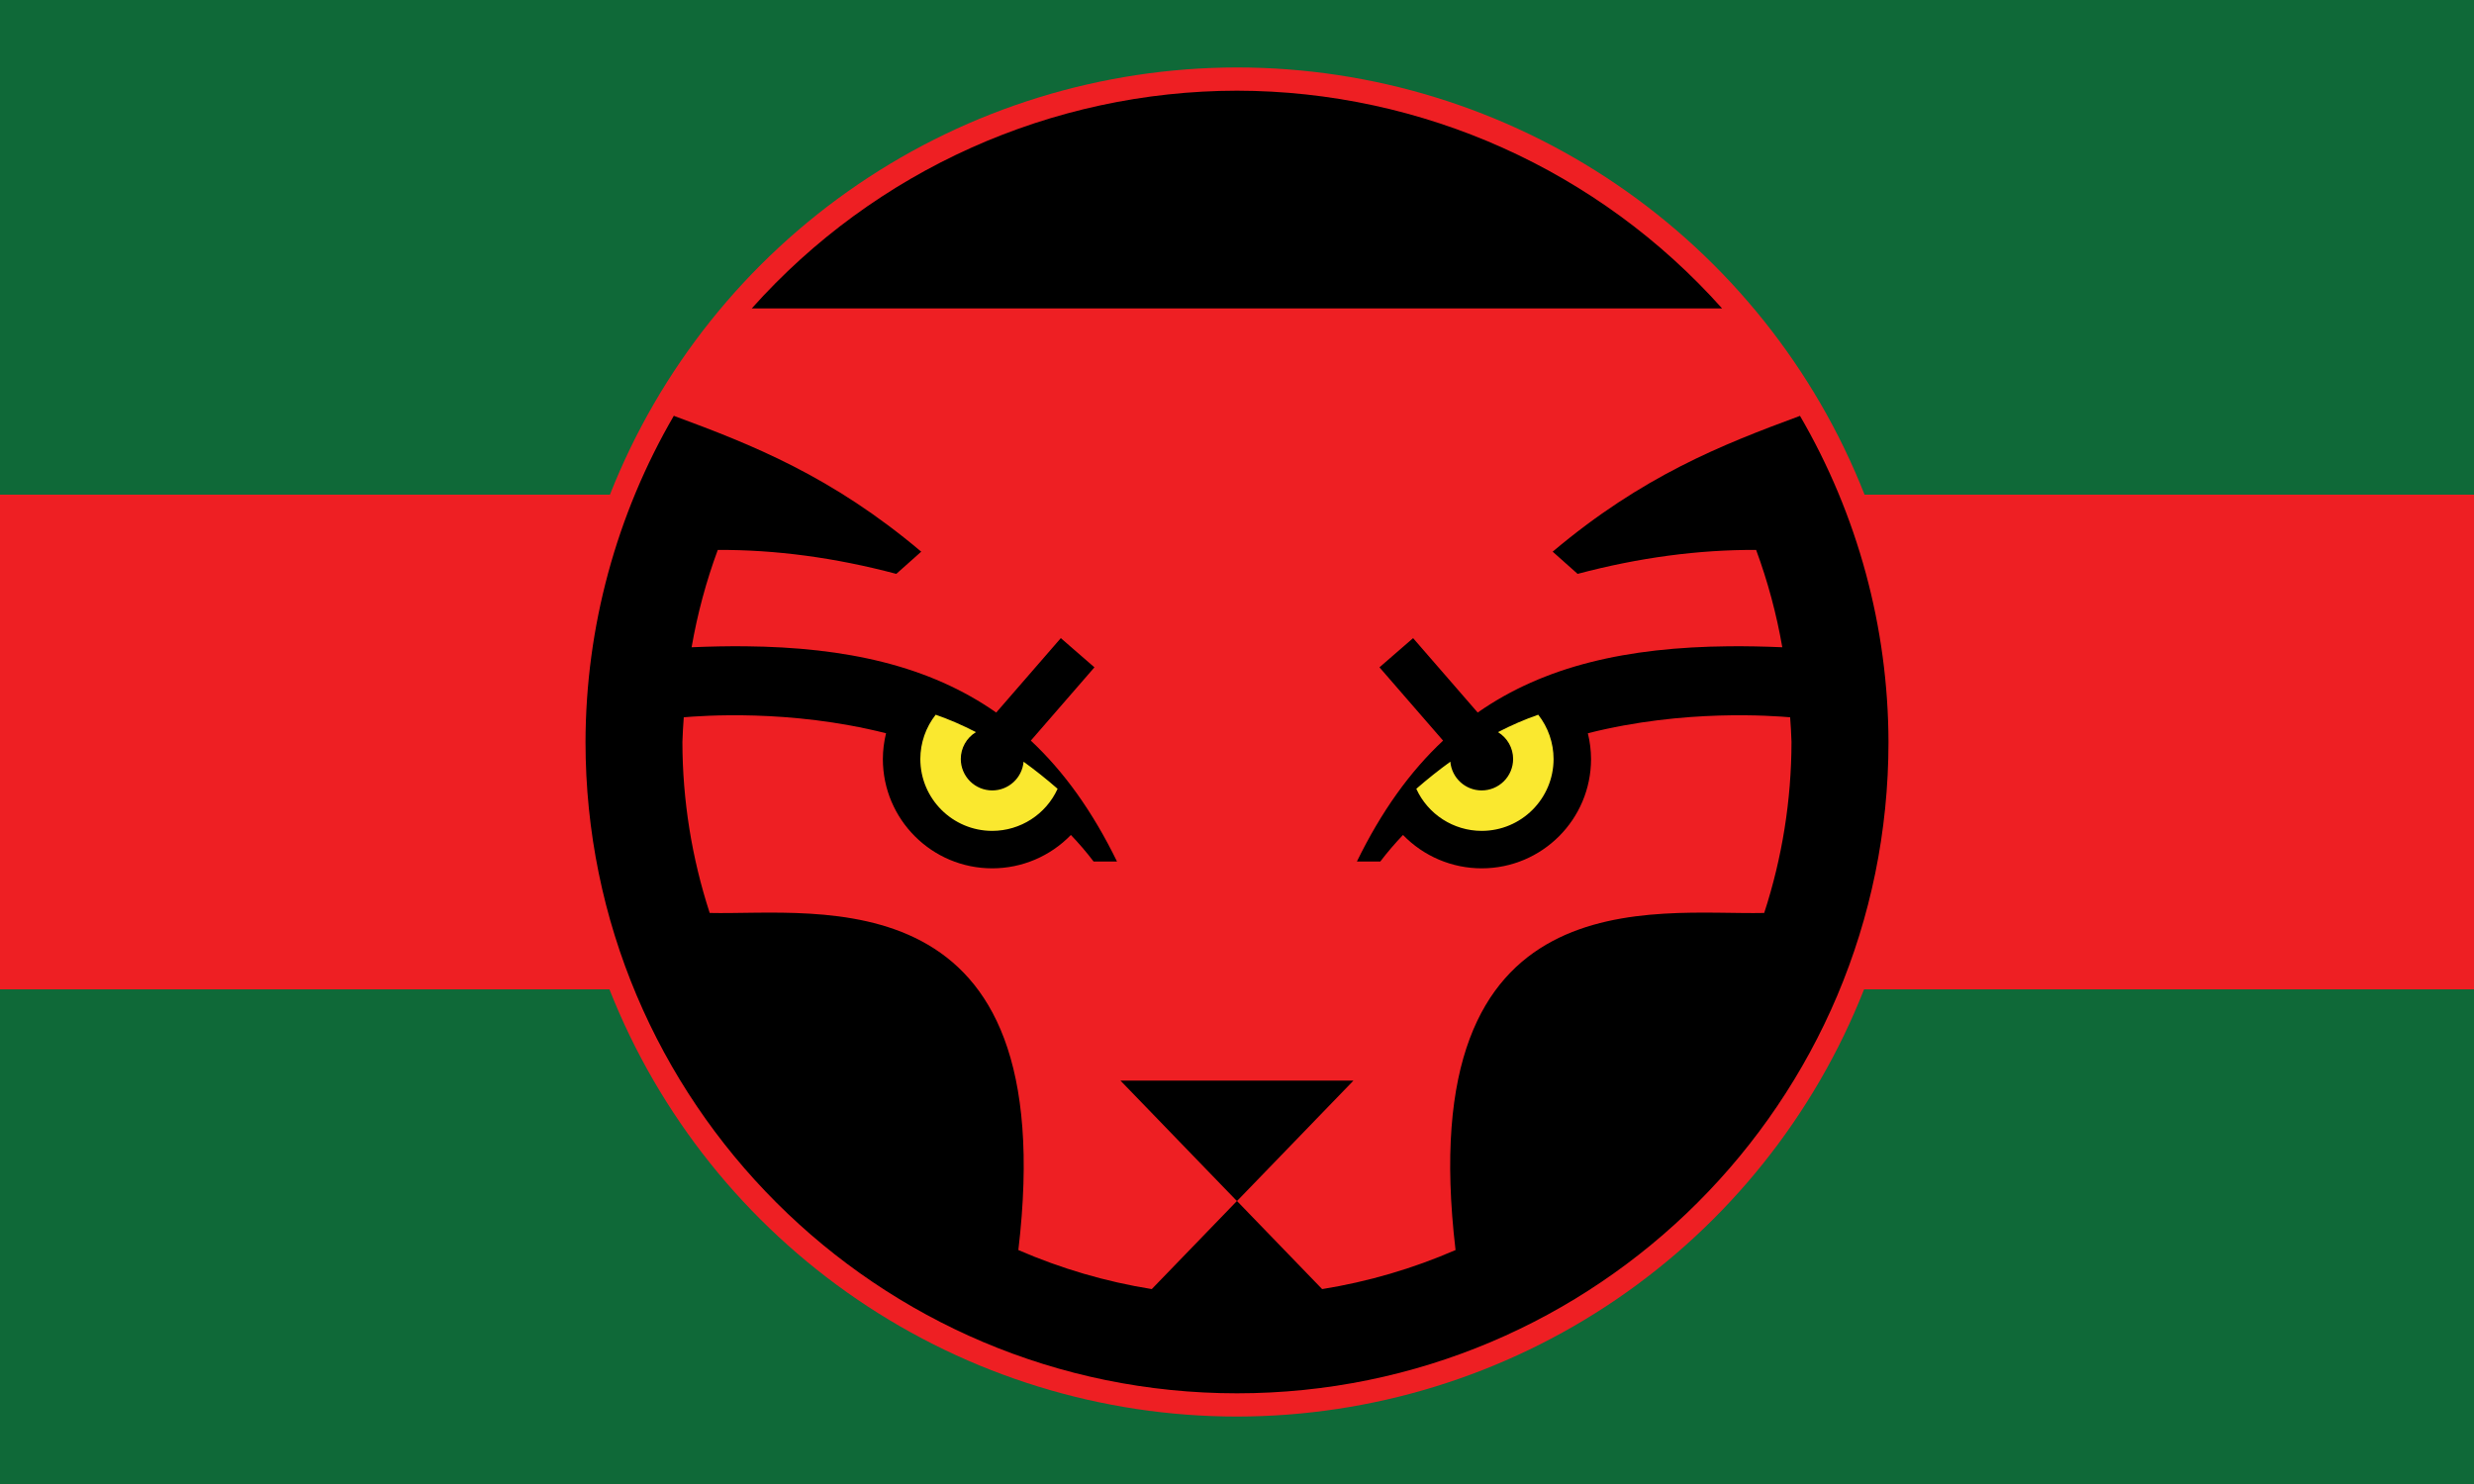

In [ ]:
##(Imagem disponível no GitHub fornecido - flag2.png)
uploaded = files.upload()

display.Image("flag2.png")

In [ ]:
#Wakanda
resultado = classificador.predict([[195,4,2,1222,50,1,8,0,2,6,1,1,1,0,1,0,0,4,0,0,0,0,0,0,1,1,1,0,3,1]])
print("Religião previsionada: {}".format(Religion(resultado)))


Religião previsionada: Marxist


### Sua vez :

Agora é sua vez. Coloque o modelo à prova e preveja a religião predominante em determinado país com base nos dados de sua banderia:

In [ ]:
r1 = 196
r2 = int(input("O continente ao qual o país pertence (1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania):"))
r3 = int(input("O quadrante geográfico ao qual o país pertence (1=NE, 2=SE, 3=SW, 4=NW):"))
r4 = int(input("A área do território (em milhares de quilômetros quadrados):"))
r5 = int(input("A população do território (em mihões):"))
r6 = int(input("A linguagem predominante (1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others):"))
r7 = 8
r8 = int(input("O número de barras verticais na bandeira:"))
r9 = int(input("O número de barras horizontais:"))
r10 = int(input("Quantidade de cores diferentes na bandeira:"))
r11 = int(input("Há vermelho na bandeira ? (0 para não, 1 para sim)"))
r12 = int(input("Há verde na bandeira ? (0 para não, 1 para sim)"))
r13 = int(input("Há azul na bandeira ? (0 para não, 1 para sim)"))
r14 = int(input("Há amarelo na bandeira ? (0 para não, 1 para sim)"))
r15 = int(input("Há branco na bandeira ? (0 para não, 1 para sim)"))
r16 = int(input("Há preto na bandeira ? (0 para não, 1 para sim)"))
r17 = int(input("Há laranja ou  marrom na bandeira ? (0 para não, 1 para sim)"))
r18 = int(input("Cor predominante na bandeira (black:0, blue:1, white:7, red:6, green:4, gold:3, orange:5):"))
r19 = int(input("Número de círculos na bandeira:"))
r20 = int(input("Número de cruzes verticais na bandeira:"))
r21 = int(input("Número de cruzes horizontais na bandeira:"))
r22 = int(input("Número de quadrantes destacados na bandeira:"))
r23 = int(input("Número de estrelas na bandeira:"))
r24 = int(input("Há uma lua crescente na bandeira ? (0 para não, 1 para sim)"))
r25 = int(input("Há um triângulo na bandeira ? (0 para não, 1 para sim)"))
r26 = int(input("Há algum desenho de objeto inanimado na bandeira ? (0 para não, 1 para sim)"))
r27 = int(input("Há algum desenho de objeto inanimado na bandeira ? (0 para não, 1 para sim)"))
r28 = int(input("Há algum texto na bandeira ? (0 para não, 1 para sim)"))
r29 = int(input("Cor predominante no canto superior esquerdo (black:0, blue:1, white:6, red:5, green:3, gold:2, orange:4):"))
r30 = int(input("Cor predominante no canto inferior esquerdo (black:0, blue:1, white:7, red:6, green:4, gold:3, orange:2):")) 

resultado = classificador.predict([[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29,r30]])
print("\n")
print("Religião previsionada: {}".format(Religion(resultado)))